In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import time
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
(x_train_full, y_train_full) , (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [24]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

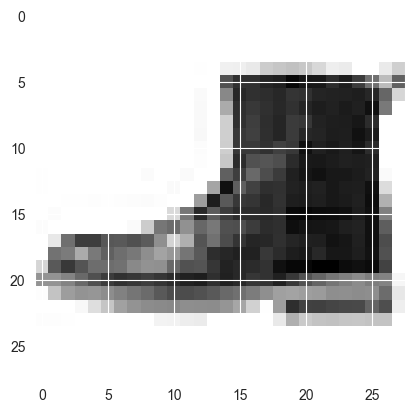

In [25]:
plt.imshow(x_train[3], cmap="binary")
plt.show()

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10,activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"]
              )

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 26661

In [30]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),verbose=1)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3435 - accuracy: 0.5915 - val_loss: 0.9148 - val_accuracy: 0.7030
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8209 - accuracy: 0.7287 - val_loss: 0.7323 - val_accuracy: 0.7508
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6996 - accuracy: 0.7689 - val_loss: 0.6573 - val_accuracy: 0.7796
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6347 - accuracy: 0.7887 - val_loss: 0.6006 - val_accuracy: 0.7938
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5922 - accuracy: 0.8028 - val_loss: 0.5653 - val_accuracy: 0.8092
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5618 - accuracy: 0.8105 - val_loss: 0.5400 - val_accuracy: 0.8174
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5391 - accuracy: 0.8180 - val_loss: 0.5195 - val_accura

In [50]:
del model

In [51]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),         
    tf.keras.layers.Dense(100),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),   
    tf.keras.layers.Dense(10,activation="softmax")
    ]

model = tf.keras.models.Sequential(LAYERS_BN)

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_18 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_19 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 300)               0         
                                                                 
 dense_25 (Dense)            (None, 100)              

In [53]:
model.compile (loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"]
            )

In [54]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid),verbose=1,batch_size=100)

Epoch 1/30
550/550 [==============================] - 3s 4ms/step - loss: 0.4640 - accuracy: 0.8346 - val_loss: 0.3658 - val_accuracy: 0.8670
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 0.3603 - accuracy: 0.8699 - val_loss: 0.3342 - val_accuracy: 0.8846
Epoch 3/30
550/550 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.8815 - val_loss: 0.3643 - val_accuracy: 0.8706
Epoch 4/30
550/550 [==============================] - 2s 4ms/step - loss: 0.3044 - accuracy: 0.8879 - val_loss: 0.3268 - val_accuracy: 0.8794
Epoch 5/30
550/550 [==============================] - 2s 4ms/step - loss: 0.2846 - accuracy: 0.8951 - val_loss: 0.3059 - val_accuracy: 0.8878
Epoch 6/30
550/550 [==============================] - 3s 5ms/step - loss: 0.2745 - accuracy: 0.8973 - val_loss: 0.3199 - val_accuracy: 0.8822
Epoch 7/30
550/550 [==============================] - 3s 5ms/step - loss: 0.2583 - accuracy: 0.9040 - val_loss: 0.3139 - val_accuracy: 0.8878
Epoch 